In [ ]:
#mahesh.s 
#20202aie0005
#ai branch(mtech) presidency
#professor- Dr smitha rao

#import all libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re
%matplotlib inline

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import PorterStemmer
import json

!pip install wordcloud
from wordcloud import WordCloud

!pip install tweet-preprocessor
import preprocessor as p
from gensim.models import KeyedVectors



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# read the csv file
df = pd.read_csv("/content/depression_tweets.csv",encoding="iso-8859-1")

In [ ]:
#view the csv
df.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0.0
1,217,is reading manga http://plurk.com/p/mzp1e,0.0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0.0
3,288,@lapcat Need to send 'em to my accountant tomo...,0.0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0.0


In [ ]:
#check missing value
df.isnull().sum()

Unnamed: 0    0
message       0
label         3
dtype: int64

In [ ]:
#dropping 
df=df.drop('Unnamed: 0',axis=1)
df=df.dropna()
df.isnull().sum()

message    0
label      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10329 entries, 0 to 10331
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   message  10329 non-null  object 
 1   label    10329 non-null  float64
dtypes: float64(1), object(1)
memory usage: 242.1+ KB


In [ ]:
#10310 rows and 2 coloumn
df.shape

(10329, 2)

In [ ]:
# 1 is depressed
df.loc[df['label']==1].value_counts().sum()

2332

In [ ]:
#0 is not depressesd
df.loc[df['label']==0].value_counts().sum()

7997

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


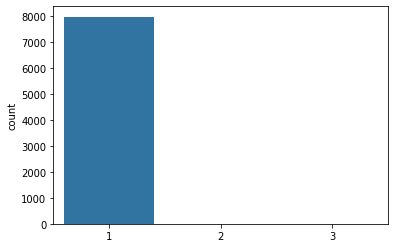

In [ ]:
sns.countplot(df.loc[df['label']==0].value_counts(),data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


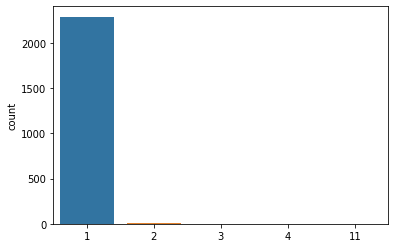

In [ ]:
sns.countplot(df.loc[df['label']==1].value_counts(),data=df)

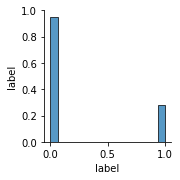

In [ ]:
sns.pairplot(data=df)

In [ ]:
#the process of becoming smaller is contractions
contractions = pd.read_json('/content/contractions.json', typ='series')
contractions = contractions.to_dict()

In [ ]:
#preprocessing
c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(message, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, message)

In [ ]:
#preprocessing
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = p.clean(tweet)
        
        #expand contraction
        tweet = expandContractions(tweet)

        #remove punctuation
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

        #stop words
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

In [ ]:
#cleaned tweets
X = clean_tweets([tweet for tweet in df['message']])

In [ ]:
#add to dataframe
df['message']=X

In [ ]:
depressive_tweets = [clean_tweets([t for t in df['message']])]
depressive_words = ' '.join(list(map(str, depressive_tweets)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

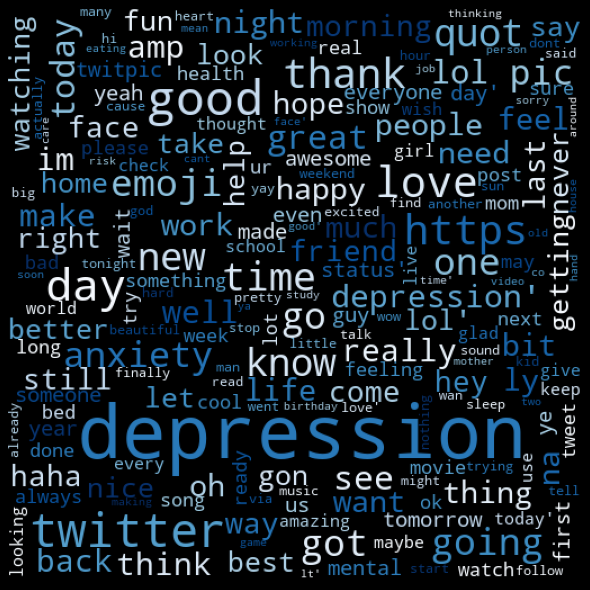

In [ ]:
#visualization
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#cleaned dataframe
df

,message,label
0,real good moment missssssssss much,0.0
1,reading manga http plurk com p mzp1e,0.0
2,comeagainjen http twitpic com y2lx http www yo...,0.0
3,lapcat need send em accountant tomorrow oddly ...,0.0
4,add myspace myspace com lookthunder,0.0
...,...,...
10327,im cold please something cant stand empty feel...,1.0
10328,im going put sleep bit longer usual call time ...,1.0
10329,feeling shall go mad go longer terrible times ...,1.0
10330,leaving world better place,1.0


In [ ]:
# convert to csv
df.to_csv("cleaned_tweets.csv",index=False)

In [ ]:
# write the variable x to json file for further use
import json
with open("X.txt", "w") as fp:
  json.dump(X, fp)
